In [18]:
# Sign Language Interpreter using tensorflow, SVM, CNN and OpenCV

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [20]:
# Importing the dataset
train = pd.read_csv('dataset/sign_mnist_train.csv')
test = pd.read_csv('dataset/sign_mnist_test.csv')

In [21]:
# Splitting the train dataset into the Training set and validation set
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [22]:
# Reshaping the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [23]:
# Normalizing the data
X_train = X_train / 255
X_test = X_test / 255

In [24]:
# Splitting the train dataset into the Training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

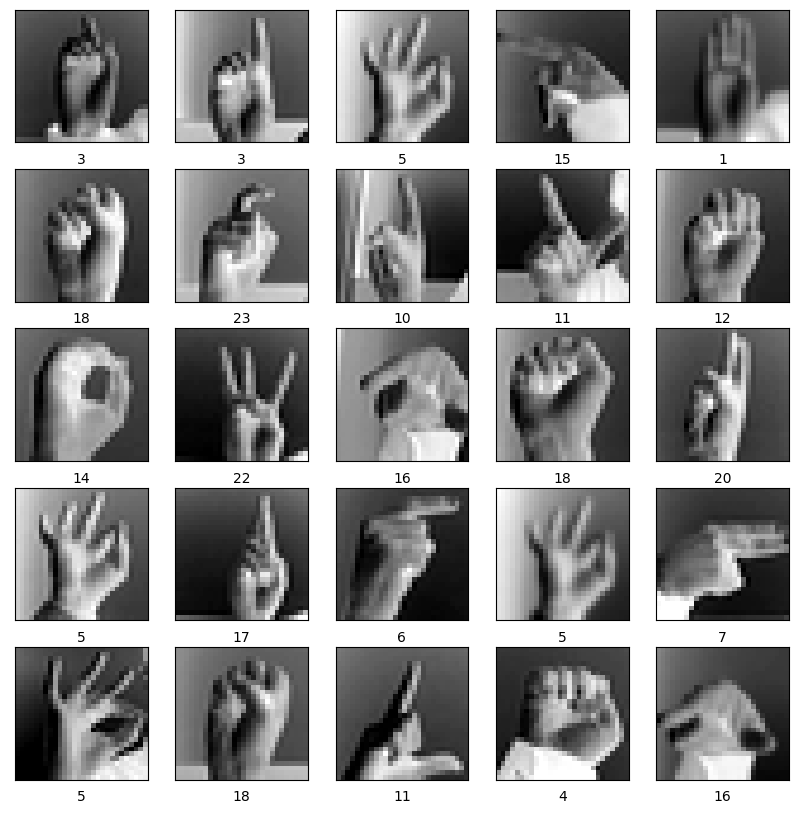

In [25]:
# Plotting the data to see the images and labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [26]:
# Building the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [27]:
# Compiling the CNN model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Training the CNN model
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
687/687 [==============================] - 6s 8ms/step - loss: 1.4304 - accuracy: 0.5506 - val_loss: 0.4941 - val_accuracy: 0.8361
Epoch 2/20
687/687 [==============================] - 6s 8ms/step - loss: 0.2936 - accuracy: 0.9048 - val_loss: 0.1585 - val_accuracy: 0.9525
Epoch 3/20
687/687 [==============================] - 6s 8ms/step - loss: 0.0907 - accuracy: 0.9757 - val_loss: 0.0458 - val_accuracy: 0.9909
Epoch 4/20
687/687 [==============================] - 6s 8ms/step - loss: 0.0244 - accuracy: 0.9952 - val_loss: 0.0229 - val_accuracy: 0.9944
Epoch 5/20
687/687 [==============================] - 6s 8ms/step - loss: 0.0297 - accuracy: 0.9922 - val_loss: 0.0335 - val_accuracy: 0.9907
Epoch 6/20
687/687 [==============================] - 6s 8ms/step - loss: 0.0159 - accuracy: 0.9961 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 7/20
687/687 [==============================] - 6s 8ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 

In [29]:
# Evaluating the CNN model with the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

225/225 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8967
Test accuracy: 0.896681547164917


In [30]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

225/225 [==============================] - 1s 2ms/step


In [31]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 432   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 273   0   0   0   0   0   0   0   0   0   0  37   0   0   0   0
    0   0   0   0   0   0]
 [  1   0   0 223   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0  19   0   1   0]
 [  0   0   0   0 493   0   0   0   0   0   0   0   0   0   0   0   0   5
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   1 297  28   1   0   0   0   0   0   2  11   0   0
    5   0   0   0   3   0]
 [  0   0   0   0   0   0  20 413   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   0 268   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  20]
 [  0   0   0   0   0   0   0   0   0 277   0   0   0   0   0   0  34   0
    0   0   0  20

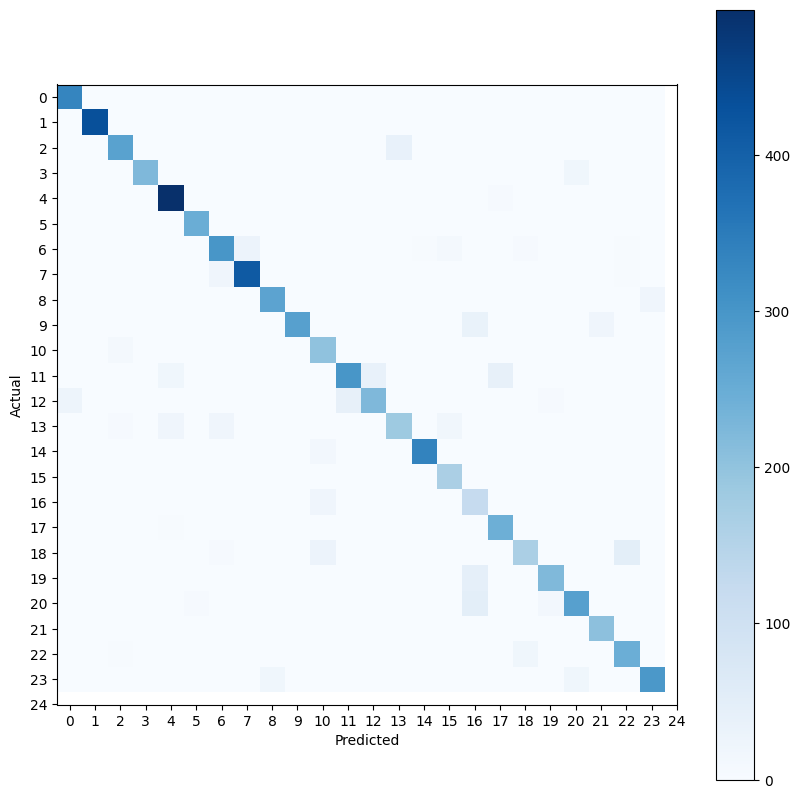

In [32]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(25))
plt.yticks(np.arange(25))
plt.colorbar()
plt.show()

In [35]:
# Saving the model
model.save('trainedModel/model.h5')


In [36]:
# Loading the model
model = keras.models.load_model('trainedModel/model.h5')